In [ ]:
# Необходимые библиотеки
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

# Задание 1
Разработайте функцию для проверки нормальности распределения выборки данных, используя шаблон в материалах к домашнему заданию. Вы можете использовать один из известных Вам статистических тестов.

In [11]:
# Для проверки нормальности распределения выборки данных можно использовать тест Шапиро-Уилка, который является одним из наиболее распространенных тестов.

def check_normality(data):
    # Проведение теста Шапиро-Уилка
    stat, p_value = stats.shapiro(data)
    
    # Уровень значимости
    alpha = 0.05
    
    # Проверка условия статистической значимости
    if p_value < alpha:
        print("Отклоняем нулевую гипотезу >> Данные распределены не нормально")
    else:
        print("Не отклоняем нулевую гипотезу >> Данные распределены нормально")

# Генерация нормально распределенных данных
data = np.random.normal(loc=0, scale=1, size=100)  
check_normality(data)

Не отклоняем нулевую гипотезу >> Данные распределены нормально


# Задание 2

Даны две выборки роста мужчин и женщин.
- Докажите, используя `t-Тест Стьюдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
- Является ли результат полезным с практической точки зрения? Почему да или нет?

## Проведение t-теста

In [17]:
# Фиксация случайности
np.random.seed(42)

# Генерация выборок
mens = stats.norm.rvs(loc=171, scale=10, size=150000)  # Выборка мужчин
womens = stats.norm.rvs(loc=170, scale=10, size=150000)  # Выборка женщин

# Проведение t-теста
t_statistic, p_value = stats.ttest_ind(mens, womens)

# Уровень значимости
alpha = 0.001

# Вывод результатов теста
print(f"T-статистика: {t_statistic}, P-значение: {p_value}")

# Проверка гипотез
if p_value < alpha:
    print("Отклоняем нулевую гипотезу. Различия статистически значимы.")
else:
    print("Не отклоняем нулевую гипотезу. Различия незначительны.")

T-статистика: 28.313635693327363, P-значение: 4.013049237709119e-176
Отклоняем нулевую гипотезу. Различия статистически значимы.


## Визуализация различий

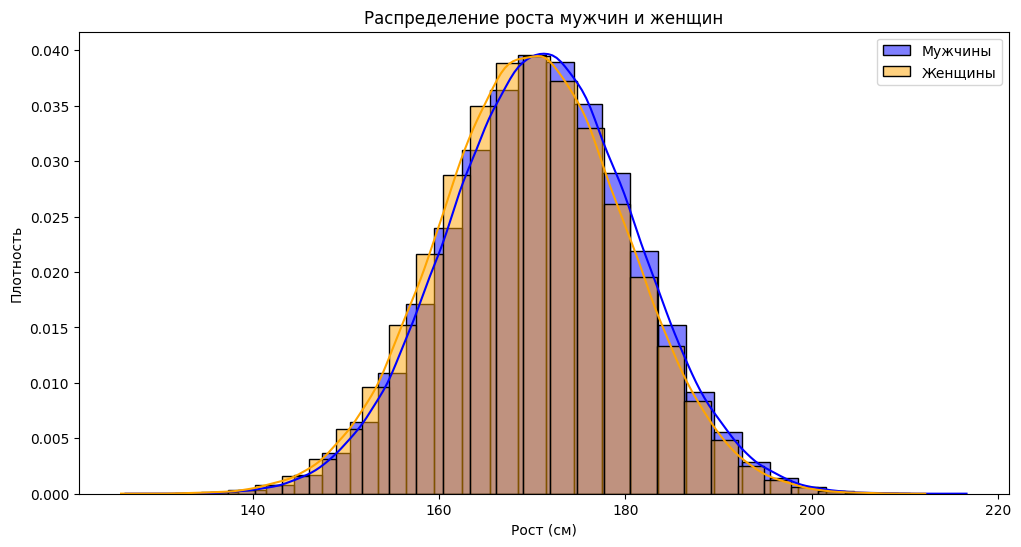

In [18]:
# Визуализация распределений
plt.figure(figsize=(12, 6))
sns.histplot(mens, bins=30, color='blue', label='Мужчины', kde=True, stat='density')
sns.histplot(womens, bins=30, color='orange', label='Женщины', kde=True, stat='density')
plt.title('Распределение роста мужчин и женщин')
plt.xlabel('Рост (см)')
plt.ylabel('Плотность')
plt.legend()
plt.show()

## Практическая значимость

Статистическая значимость: Если p-значение больше 0.001, это означает, что различия в росте между мужчинами и женщинами не являются статистически значимыми. Это может указывать на то, что в реальной жизни разница в росте не так велика, как может показаться на первый взгляд.

Практическая значимость: Даже если различия статистически незначимы, это не означает, что они не имеют значения в реальной жизни. Например, если разница в росте составляет всего 1 см, это может быть несущественным для большинства практических приложений, таких как выбор одежды или спортивной экипировки. Однако в некоторых контекстах, таких как медицинские исследования или антропометрические исследования, даже небольшие различия могут иметь значение.

# Задание 3

Специалист по кадрам, работающий в технологической компании, интересуется сверхурочным временем разных команд. Чтобы выяснить, есть ли разница между сверхурочной работой команды разработчиков программного обеспечения и группы тестирования, она случайным образом выбрала 17 сотрудников в каждой из двух команд и записала их среднее сверхурочное время за неделю в пересчете на час.

В соответствии с этой информацией проведите проверку гипотезы, чтобы проверить, есть ли разница между переутомлением двух команд, используя уровень значимости 0,05. Прежде чем приступать к проверке гипотез, проверьте предположение нормальности.

In [22]:
# Данные
test_team = [6.2, 7.1, 1.5, 2.3, 2, 1.5, 6.1, 2.4, 2.3, 12.4, 1.8, 5.3, 3.1, 9.4, 2.3, 4.1]
developer_team = [2.3, 2.1, 1.4, 2.0, 8.7, 2.2, 3.1, 4.2, 3.6, 2.5, 3.1, 6.2, 12.1, 3.9, 2.2, 1.2, 3.4]

# Проверка нормальности для команды тестирования
stat_test, p_value_test = stats.shapiro(test_team)
print(f"Тест Шапиро для команды тестирования: T-статистика = {stat_test}, P-значение = {p_value_test}")

# Проверка нормальности для команды разработчиков
stat_dev, p_value_dev = stats.shapiro(developer_team)
print(f"Тест Шапиро для команды разработчиков: T-статистика = {stat_dev}, P-значение = {p_value_dev}")

# Уровень значимости
alpha = 0.05

# Проверка гипотез о нормальности
if p_value_test < alpha:
    print("Данные команды тестирования распределены ненормально.")
else:
    print("Данные команды тестирования распределены нормально.")

if p_value_dev < alpha:
    print("Данные команды разработчиков распределены ненормально.")
else:
    print("Данные команды разработчиков распределены нормально.")

# Проведение t-теста, если обе выборки нормальны
if p_value_test >= alpha and p_value_dev >= alpha:
    t_statistic, p_value = stats.ttest_ind(test_team, developer_team)
    print(f"T-статистика: {t_statistic}, P-значение: {p_value}")

    # Проверка гипотез
    if p_value < alpha:
        print("Отклоняем нулевую гипотезу. Различия статистически значимы.")
    else:
        print("Не отклоняем нулевую гипотезу. Различия незначительны.")
else:
    print("Необходимо использовать непараметрический тест, так как данные не распределены нормально.\nПрименяем тест Манна-Уитни")
    # Проведение теста Манна-Уитни
    u_statistic, p_value = stats.mannwhitneyu(test_team, developer_team, alternative='two-sided')

    # Вывод результатов теста
    print(f"U-статистика: {u_statistic}, P-значение: {p_value}")

    # Проверка гипотез
    if p_value < alpha:
        print("Отклоняем нулевую гипотезу. Различия статистически значимы.")
    else:
        print("Не отклоняем нулевую гипотезу. Различия незначительны.\nНет никакой разницы между переутомлением двух команд!")

Тест Шапиро для команды тестирования: T-статистика = 0.8326535022274413, P-значение = 0.007648028759920075
Тест Шапиро для команды разработчиков: T-статистика = 0.7527354794901837, P-значение = 0.000489113275069916
Данные команды тестирования распределены ненормально.
Данные команды разработчиков распределены ненормально.
Необходимо использовать непараметрический тест, так как данные не распределены нормально.
Применяем тест Манна-Уитни
U-статистика: 147.5, P-значение: 0.6914867155382572
Не отклоняем нулевую гипотезу. Различия незначительны.
Нет никакой разницы между переутомлением двух команд!


# Задание 4

Педиатр хочет увидеть влияние потребления смеси на среднемесячную прибавку в весе у новорожденных. По этой причине она собрала данные из трех разных групп.

Первая группа – дети исключительно грудного вскармливания;
Вторая группа – дети, которых кормят только смесью;
Третья группа – это дети, находящиеся на искусственном вскармливании и на грудном вскармливании.

В соответствии с этой информацией проведите проверку гипотезы, чтобы проверить, есть ли разница между среднемесячным приростом этих трех групп, используя уровень значимости 0,05.
Если есть значительная разница, выполните дальнейший анализ, чтобы найти причину разницы.

In [ ]:
# Данные
only_breast = [794.1, 716.9, 993.0, 724.7, 760.9, 908.2, 659.3, 690.8, 768.7, 717.3, 630.7, 729.5, 714.1, 810.3, 583.5, 679.9, 865.1]
only_formula = [898.8, 881.2, 940.2, 966.2, 957.5, 1061.7, 1046.2, 980.4, 895.6, 919.7, 1074.1, 952.5, 796.3, 859.6, 871.1, 1047.5, 919.1, 1160.5, 996.9]
both = [976.4, 656.4, 861.2, 706.8, 718.5, 717.1, 759.8, 894.6, 867.6, 805.6, 765.4, 800.3, 789.9, 875.3, 740.0, 799.4, 790.3, 795.2, 823.6, 818.7, 926.8, 791.7, 948.3]

# Уровень значимости
alpha = 0.05

# Проверяем каждую группу на нормальность
dict = { "'Только грудь'": only_breast, "'Только смесь'":only_formula, "'Смесь+грудь'": both}
for key in dict:
  stat_dev, p_value_test = shapiro(dict[key])
  if (p_value_test) > alpha:
    print(f"Нормальность подтверждена для: {key}")
  else:
    raise ValueError("Даже не пытаюсь обабатывать этот случай. Данные известны заранее.")

print()
# Применение t-теста для парных сравнений
# Сравнение "Только грудь" и "Только смесь"
t_statistic_0, p_value_0 = stats.ttest_ind(only_breast, only_formula)
print(f"Сравнение 'Только грудь' и 'Только смесь': t-статистика = {t_statistic_0}, p-значение = {p_value_0}")
# Проверка гипотез
if p_value_0 < alpha:
    print("'Только грудь' и 'Только смесь': Различия статистически значимы.")
else:
    print("'Только грудь' и 'Только смесь': Различия незначимы.")

# Сравнение "Только грудь" и "Смесь+грудь"
t_statistic_1, p_value_1 = stats.ttest_ind(only_breast, both)
print(f"Сравнение 'Только грудь' и 'Смесь+грудь': t-статистика = {t_statistic_1}, p-значение = {p_value_1}")
# Проверка гипотез
if p_value_1 < alpha:
    print("'Только грудь' и 'Смесь+грудь': Различия статистически значимы.")
else:
    print("'Только грудь' и 'Смесь+грудь': Различия незначимы.")

# Сравнение "Только смесь" и "Смесь+грудь"
t_statistic_2, p_value_2 = stats.ttest_ind(only_formula, both)
print(f"Сравнение 'Только смесь' и 'Смесь+грудь': t-статистика = {t_statistic_2}, p-значение = {p_value_2}")
# Проверка гипотез
if p_value_2 < alpha:
    print("'Только смесь' и 'Смесь+грудь': Различия статистически значимы.")
else:
    print("'Только смесь' и 'Смесь+грудь': Различия незначимы.")

# Вывод:
# Значимыя различия между группами 'Только грудь' и 'Только смесь', а также
# значимые различия между группами 'Только смесь' и 'Смесь+грудь'.
#
# Странная история... Ощущение, что вариант 'только смесь' всегда в выигрыше. Попробую погуглить другие алгоритмы...

Нормальность подтверждена для: 'Только грудь'
Нормальность подтверждена для: 'Только смесь'
Нормальность подтверждена для: 'Смесь+грудь'

Сравнение 'Только грудь' и 'Только смесь': t-статистика = -6.5730537540281135, p-значение = 1.5674024199277877e-07
'Только грудь' и 'Только смесь': Различия статистически значимы.
Сравнение 'Только грудь' и 'Смесь+грудь': t-статистика = -2.092227034445557, p-значение = 0.04315143345605874
'Только грудь' и 'Смесь+грудь': Различия статистически значимы.
Сравнение 'Только смесь' и 'Смесь+грудь': t-статистика = 5.720114793736868, p-значение = 1.1692474866673824e-06
'Только смесь' и 'Смесь+грудь': Различия статистически значимы.


In [ ]:
# Вот такое нагуглилось:
# Пост-хок тест (Тест Тьюки) для определения, какие группы различаются
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Данные
only_breast = [794.1, 716.9, 993.0, 724.7, 760.9, 908.2, 659.3, 690.8, 768.7, 717.3, 630.7, 729.5, 714.1, 810.3, 583.5, 679.9, 865.1]
only_formula = [898.8, 881.2, 940.2, 966.2, 957.5, 1061.7, 1046.2, 980.4, 895.6, 919.7, 1074.1, 952.5, 796.3, 859.6, 871.1, 1047.5, 919.1, 1160.5, 996.9]
both = [976.4, 656.4, 861.2, 706.8, 718.5, 717.1, 759.8, 894.6, 867.6, 805.6, 765.4, 800.3, 789.9, 875.3, 740.0, 799.4, 790.3, 795.2, 823.6, 818.7, 926.8, 791.7, 948.3]

# Проверка нормальности для каждой группы
def check_normality(data, group_name):
    stat, p_value = stats.shapiro(data)
    print(f"Тест Шапиро для группы '{group_name}': T-статистика = {stat}, P-значение = {p_value}")
    return p_value

p_value_breast = check_normality(only_breast, "только грудное вскармливание")
p_value_formula = check_normality(only_formula, "только смесь")
p_value_both = check_normality(both, "смешанное вскармливание")

# Уровень значимости
alpha = 0.05

# Проверка нормальности
normal_breast = p_value_breast >= alpha
normal_formula = p_value_formula >= alpha
normal_both = p_value_both >= alpha

# Проведение ANOVA-теста, если все группы нормальны
if normal_breast and normal_formula and normal_both:
    f_statistic, p_value_anova = stats.f_oneway(only_breast, only_formula, both)
    print(f"F-статистика: {f_statistic}, P-значение ANOVA: {p_value_anova}")

    # Проверка гипотез
    if p_value_anova < alpha:
        print("Отклоняем нулевую гипотезу. Есть значительные различия между группами.")
        data = np.concatenate([only_breast, only_formula, both])
        groups = ['Грудное'] * len(only_breast) + ['Смесь'] * len(only_formula) + ['Смешанное'] * len(both)
        tukey_result = pairwise_tukeyhsd(endog=data, groups=groups, alpha=0.05)
        print(tukey_result)
    else:
        print("Не отклоняем нулевую гипотезу. Различий между группами нет.")
else:
    print("Данные не распределены нормально. ANOVA не может быть выполнен.")

# И эта реализация показывает такие же результаты (см. на колонку reject и значение True).
# Вывод:
# Дети, питающиеся смесью, показывают большую среднемесячную прибавку в весе по сравнению с детьми, находящимися на грудном вскармливании или грудном вскармливании с прикормом.

Тест Шапиро для группы 'только грудное вскармливание': T-статистика = 0.9508075752265375, P-значение = 0.4694182269784564
Тест Шапиро для группы 'только смесь': T-статистика = 0.9760827007464016, P-значение = 0.887901797775654
Тест Шапиро для группы 'смешанное вскармливание': T-статистика = 0.9746062553858199, P-значение = 0.7972954389530583
F-статистика: 26.701251857537958, P-значение ANOVA: 7.186235502885824e-09
Отклоняем нулевую гипотезу. Есть значительные различия между группами.
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
 group1   group2   meandiff p-adj    lower    upper   reject
------------------------------------------------------------
Грудное     Смесь  209.3923    0.0  137.3508 281.4337   True
Грудное Смешанное   60.1286 0.0995   -8.8912 129.1485  False
  Смесь Смешанное -149.2636    0.0 -216.1621 -82.3651   True
------------------------------------------------------------
